<a href="https://colab.research.google.com/github/LeroyChris/Custumer_Churn_Analysis/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

df=pd.read_csv('UAS FODS K-3.csv')

In [ ]:
df.head(60)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,30,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17,1
1,2,65,female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,666,1
2,3,55,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3,1
3,4,58,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29,1
4,5,23,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20,1
5,6,51,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8,1
6,8,58,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24,1
7,9,55,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30,1
8,10,39,Male,12.0,5.0,7.0,4.0,standard,Quarterly,969.0,13,1
9,11,64,Female,3.0,25.0,2.0,11.0,standard,Quarterly,415.0,29,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         203 non-null    int64  
 1   Age                203 non-null    int64  
 2   Gender             203 non-null    object 
 3   Tenure             200 non-null    float64
 4   Usage Frequency    202 non-null    float64
 5   Support Calls      177 non-null    float64
 6   Payment Delay      196 non-null    float64
 7   Subscription Type  203 non-null    object 
 8   Contract Length    203 non-null    object 
 9   Total Spend        203 non-null    float64
 10  Last Interaction   203 non-null    int64  
 11  Churn              203 non-null    int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 19.2+ KB


# Data Cleaning
1. Grouping

In [ ]:
# Kolom 'CustomerID' akan dihapus sekarang setelah data dimuat ulang.
df = df.drop('CustomerID', axis=1)
df = df.drop_duplicates()


# Simplifikasi Data (Kategorisasi)
# Tentukan kuartil untuk batas kategorisasi (Q1 dan Q3)
q1_age = df['Age'].quantile(0.25)
q3_age = df['Age'].quantile(0.75)

q1_tenure = df['Tenure'].quantile(0.25)
q3_tenure = df['Tenure'].quantile(0.75)

q1_spend = df['Total Spend'].quantile(0.25)
q3_spend = df['Total Spend'].quantile(0.75)


# 1. Kategorisasi Age (Usia)
age_bins = [0, q1_age, q3_age, df['Age'].max() + 1]
age_labels = ['muda', 'dewasa', 'senior']

df['Age_Category'] = pd.cut(
    df['Age'],
    bins=age_bins,
    labels=age_labels,
    right=True,
    include_lowest=True
)
df = df.drop('Age', axis=1) # Hapus kolom Age yang lama


# 2. Kategorisasi Tenure (Lama Berlangganan)
tenure_bins = [0, q1_tenure, q3_tenure, df['Tenure'].max() + 1]
tenure_labels = ['pendek', 'menengah', 'panjang']

df['Tenure_Category'] = pd.cut(
    df['Tenure'],
    bins=tenure_bins,
    labels=tenure_labels,
    right=True,
    include_lowest=True
)
df = df.drop('Tenure', axis=1) # Hapus kolom Tenure yang lama


# 3. Kategorisasi Total Spend (Total Pengeluaran)
spend_bins = [0, q1_spend, q3_spend, df['Total Spend'].max() + 1]
spend_labels = ['rendah', 'sedang', 'tinggi']

df['Spend_Category'] = pd.cut(
    df['Total Spend'],
    bins=spend_bins,
    labels=spend_labels,
    right=True,
    include_lowest=True
)
df = df.drop('Total Spend', axis=1) # Hapus kolom Total Spend yang lama


print("Data Head Setelah Data Cleansing dan Kategorisasi:")
print(df.head())
print("\nKolom-kolom setelah kategorisasi:")
print(df.columns)

Data Head Setelah Data Cleansing dan Kategorisasi:
   Gender  Usage Frequency  Support Calls  Payment Delay Subscription Type  \
0  Female             14.0            5.0           18.0          Standard   
1  female              1.0           10.0            8.0             Basic   
2  Female              4.0            6.0           18.0             Basic   
3    Male             21.0            7.0            7.0          Standard   
4    Male             20.0            5.0            8.0             Basic   

  Contract Length  Last Interaction  Churn Age_Category Tenure_Category  \
0          Annual                17      1       dewasa        menengah   
1         Monthly               666      1       senior         panjang   
2       Quarterly                 3      1       senior          pendek   
3         Monthly                29      1       senior        menengah   
4         Monthly                20      1         muda        menengah   

  Spend_Category  
0         

membersihkan missing value, inkosistensi format, Outlier dan duplicate

In [ ]:
# Memuat ulang dan membersihkan data tanpa menghapus kolom numerik asli.
df = pd.read_csv('UAS FODS K-3.csv')
df = df.drop('CustomerID', axis=1)
df = df.drop_duplicates()
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Subscription Type'] = df['Subscription Type'].str.lower().str.strip()
df['Contract Length'] = df['Contract Length'].str.lower().str.strip()
missing_cols = ['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay']
for col in missing_cols:
    df[col].fillna(df[col].mean(), inplace=True)
df['Last Interaction'] = np.where(df['Last Interaction'] == 666.0, 6.0, df['Last Interaction'])
df['Last Interaction'] = np.where(df['Last Interaction'] == 999.0, 9.0, df['Last Interaction'])
rows_to_drop = range(195, 204)
df = df.drop(index=rows_to_drop, errors='ignore')

/tmp/ipython-input-4003288188.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


# Exploratory Data Analysis

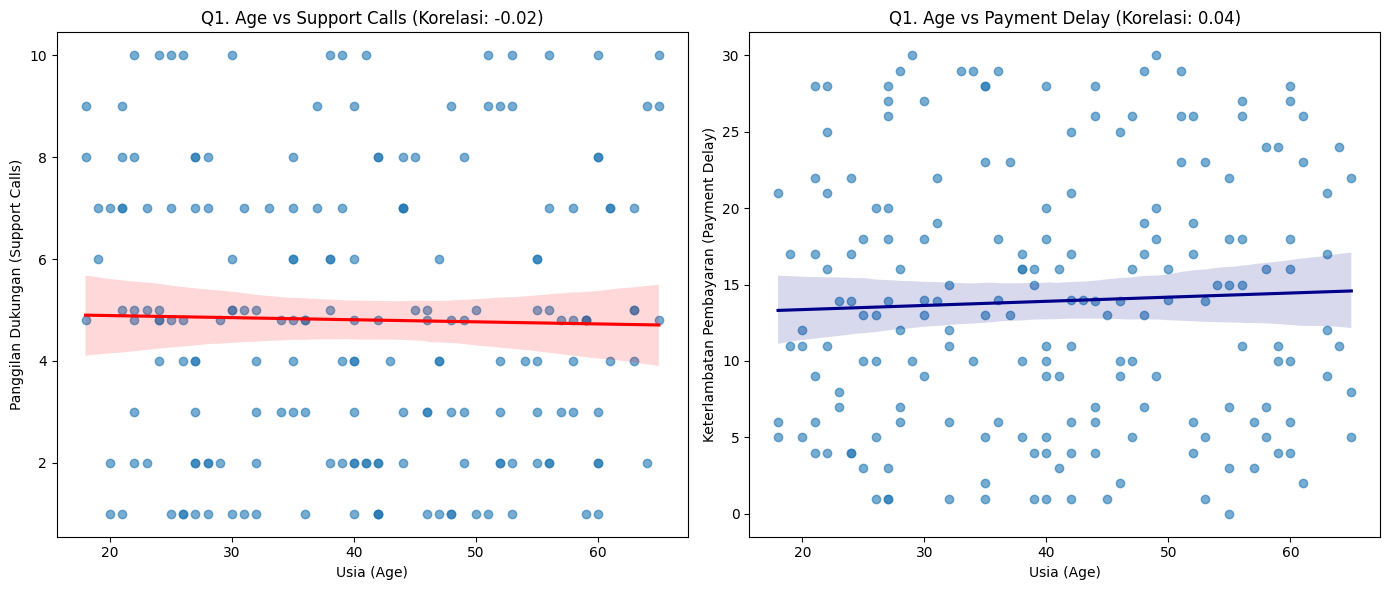

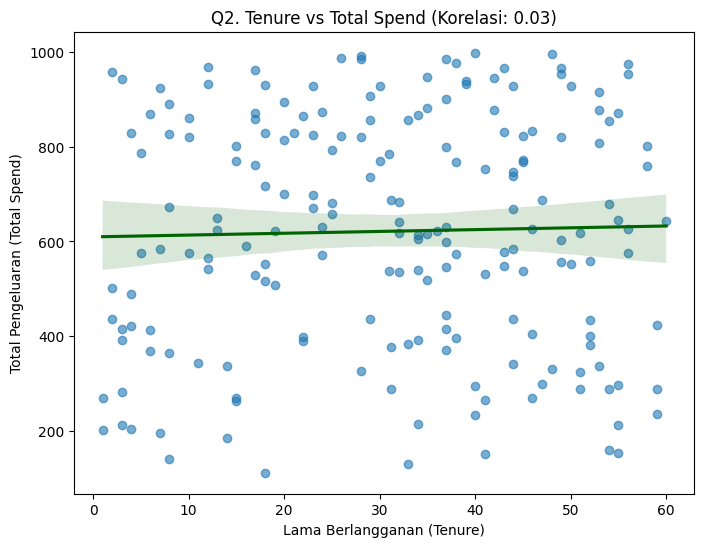

/tmp/ipython-input-1799977758.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Subscription Type', y='Usage Frequency', data=df, palette='viridis')


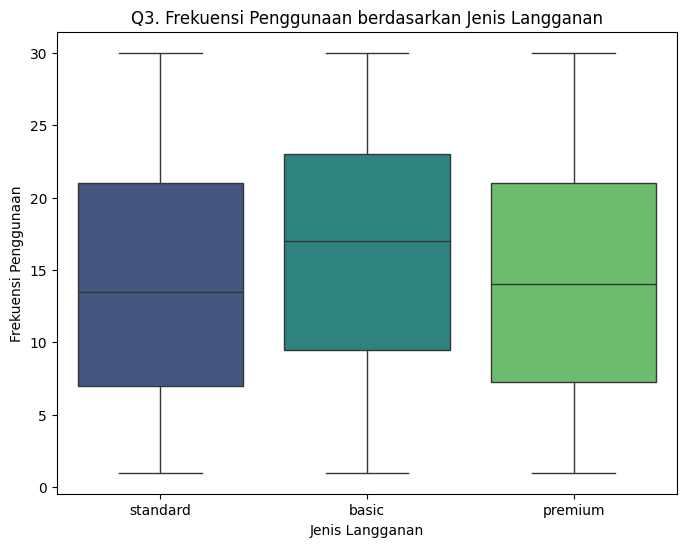

/tmp/ipython-input-1799977758.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Usage Frequency', data=df, ci=None, palette='pastel')
/tmp/ipython-input-1799977758.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Usage Frequency', data=df, ci=None, palette='pastel')
/tmp/ipython-input-1799977758.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Churn', data=churn_rate_by_gender, palette='pastel')


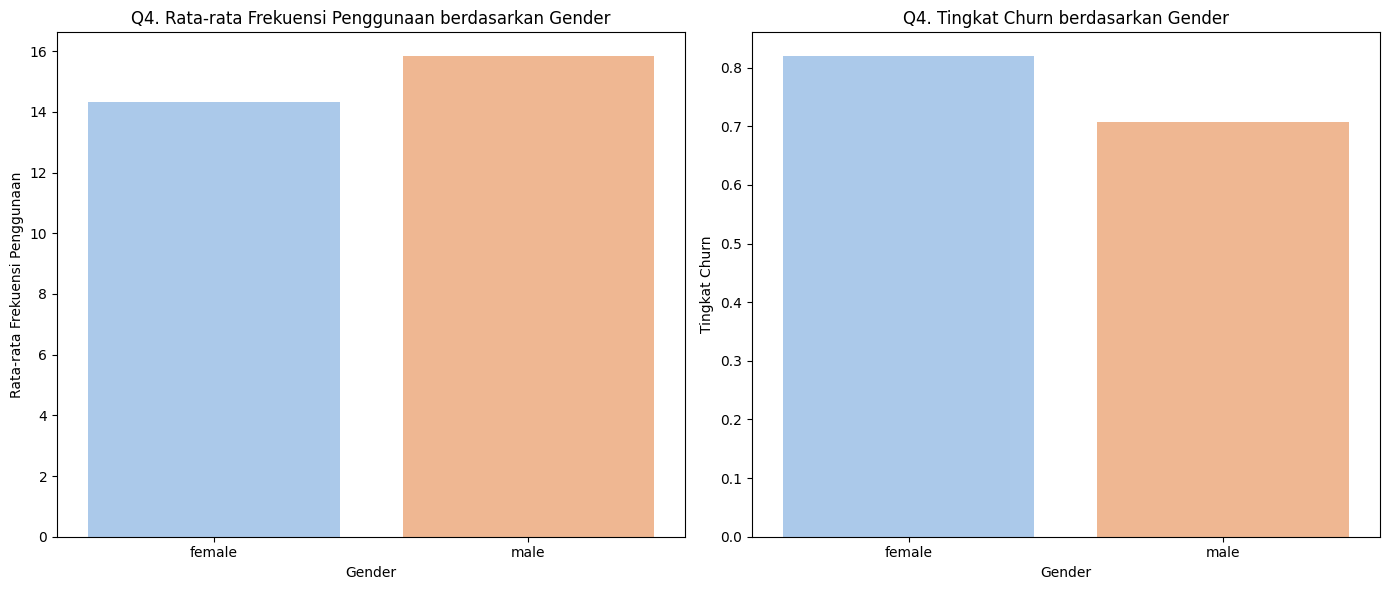

/tmp/ipython-input-1799977758.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract Length', y='Churn', data=churn_rate_by_contract,


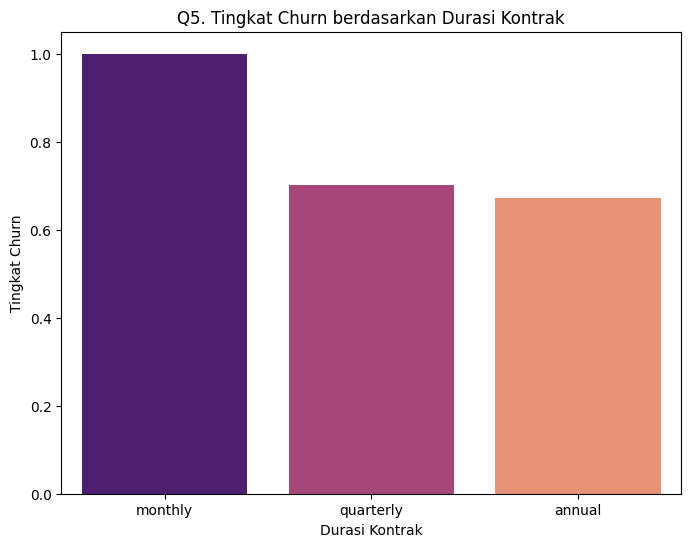

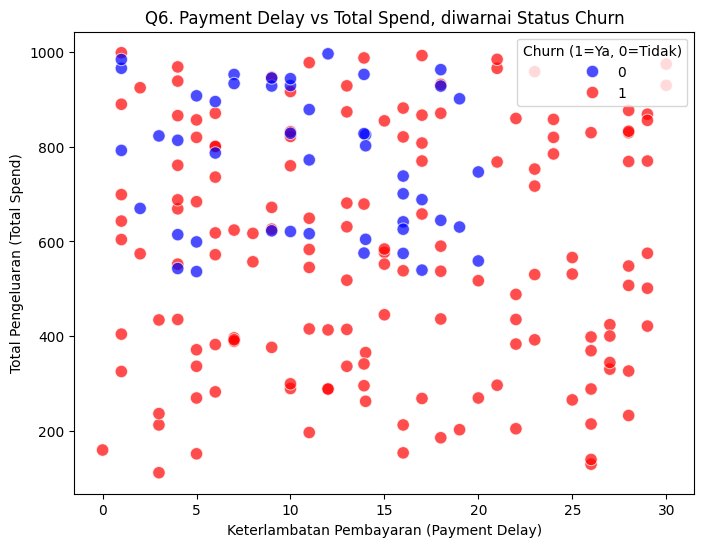

/tmp/ipython-input-1799977758.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Support Calls', data=df, palette='cividis')


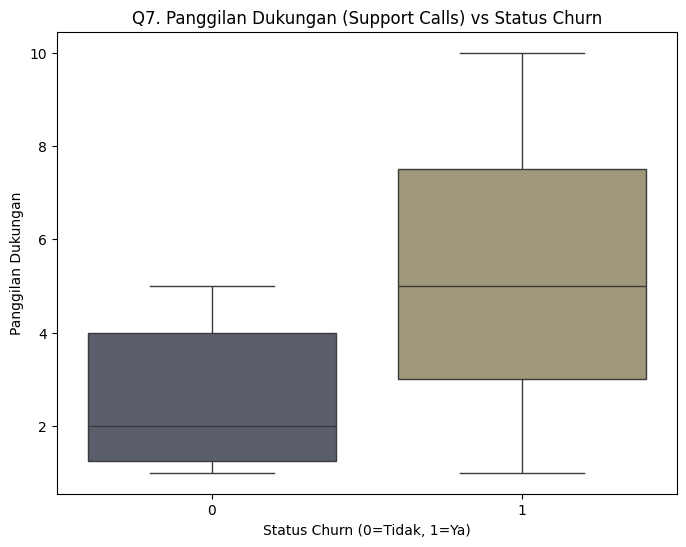

/tmp/ipython-input-1799977758.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Last Interaction', data=df, palette='cubehelix')


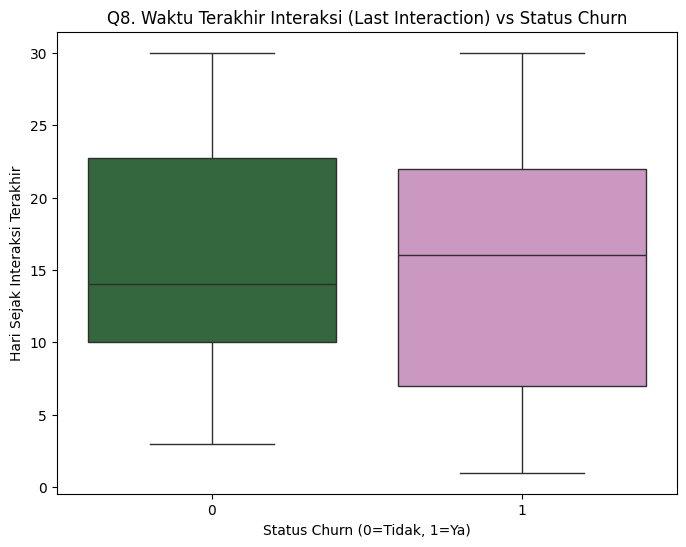

/tmp/ipython-input-1799977758.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Subscription Type', y='Total Spend', data=spend_by_sub, palette='crest')
/tmp/ipython-input-1799977758.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Subscription Type', y='Churn', data=churn_by_sub, palette='crest')


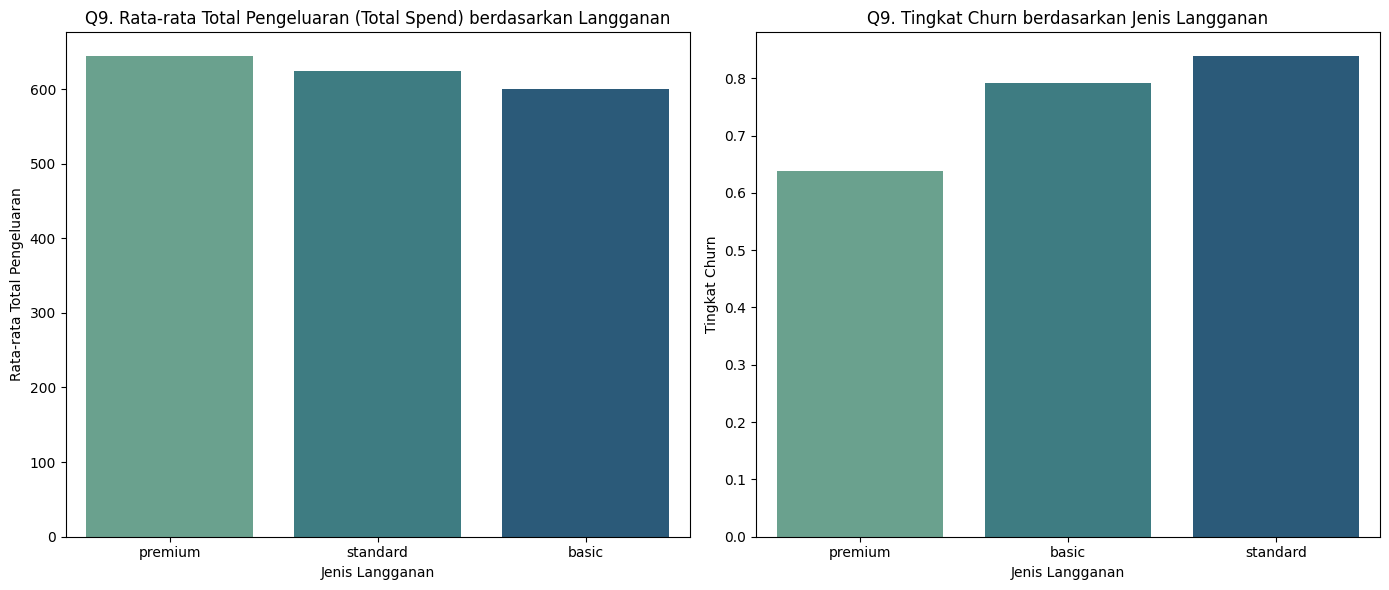

In [ ]:
# Visualisasi Q1-Q9

# Q1: Age vs Support Calls & Payment Delay
correlation_support = df['Age'].corr(df['Support Calls'])
correlation_payment = df['Age'].corr(df['Payment Delay'])

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.regplot(x='Age', y='Support Calls', data=df, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title(f'Q1. Age vs Support Calls (Korelasi: {correlation_support:.2f})', fontsize=12)
plt.xlabel('Usia (Age)'); plt.ylabel('Panggilan Dukungan (Support Calls)')
plt.subplot(1, 2, 2)
sns.regplot(x='Age', y='Payment Delay', data=df, scatter_kws={'alpha':0.6}, line_kws={"color": "darkblue"})
plt.title(f'Q1. Age vs Payment Delay (Korelasi: {correlation_payment:.2f})', fontsize=12)
plt.xlabel('Usia (Age)'); plt.ylabel('Keterlambatan Pembayaran (Payment Delay)')
plt.tight_layout(); plt.show()


# Q2: Tenure vs Total Spend
correlation_tenure_spend = df['Tenure'].corr(df['Total Spend'])
plt.figure(figsize=(8, 6))
sns.regplot(x='Tenure', y='Total Spend', data=df, scatter_kws={'alpha':0.6}, line_kws={"color": "darkgreen"})
plt.title(f'Q2. Tenure vs Total Spend (Korelasi: {correlation_tenure_spend:.2f})', fontsize=12)
plt.xlabel('Lama Berlangganan (Tenure)'); plt.ylabel('Total Pengeluaran (Total Spend)')
plt.show()


# Q3: Usage Frequency vs Subscription Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Subscription Type', y='Usage Frequency', data=df, palette='viridis')
plt.title('Q3. Frekuensi Penggunaan berdasarkan Jenis Langganan', fontsize=12)
plt.xlabel('Jenis Langganan'); plt.ylabel('Frekuensi Penggunaan')
plt.show()


# Q4: Gender vs Usage Frequency & Churn Rate
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Gender', y='Usage Frequency', data=df, ci=None, palette='pastel')
plt.title('Q4. Rata-rata Frekuensi Penggunaan berdasarkan Gender', fontsize=12)
plt.xlabel('Gender'); plt.ylabel('Rata-rata Frekuensi Penggunaan')
plt.subplot(1, 2, 2)
churn_rate_by_gender = df.groupby('Gender')['Churn'].mean().reset_index()
sns.barplot(x='Gender', y='Churn', data=churn_rate_by_gender, palette='pastel')
plt.title('Q4. Tingkat Churn berdasarkan Gender', fontsize=12)
plt.xlabel('Gender'); plt.ylabel('Tingkat Churn')
plt.tight_layout(); plt.show()


# Q5: Contract Length vs Churn
churn_rate_by_contract = df.groupby('Contract Length')['Churn'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Contract Length', y='Churn', data=churn_rate_by_contract,
            order=['monthly', 'quarterly', 'annual'], palette='magma')
plt.title('Q5. Tingkat Churn berdasarkan Durasi Kontrak', fontsize=12)
plt.xlabel('Durasi Kontrak'); plt.ylabel('Tingkat Churn')
plt.show()


# Q6: Payment Delay vs Total Spend & Churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Payment Delay', y='Total Spend', hue='Churn', data=df,
                palette={0: 'blue', 1: 'red'}, alpha=0.7, s=80)
plt.title('Q6. Payment Delay vs Total Spend, diwarnai Status Churn', fontsize=12)
plt.xlabel('Keterlambatan Pembayaran (Payment Delay)'); plt.ylabel('Total Pengeluaran (Total Spend)')
plt.legend(title='Churn (1=Ya, 0=Tidak)'); plt.show()


# Q7: Support Calls vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Support Calls', data=df, palette='cividis')
plt.title('Q7. Panggilan Dukungan (Support Calls) vs Status Churn', fontsize=12)
plt.xlabel('Status Churn (0=Tidak, 1=Ya)'); plt.ylabel('Panggilan Dukungan')
plt.show()


# Q8: Last Interaction vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Last Interaction', data=df, palette='cubehelix')
plt.title('Q8. Waktu Terakhir Interaksi (Last Interaction) vs Status Churn', fontsize=12)
plt.xlabel('Status Churn (0=Tidak, 1=Ya)'); plt.ylabel('Hari Sejak Interaksi Terakhir')
plt.show()


# Q9: Subscription Type vs Total Spend & Churn Rate
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
spend_by_sub = df.groupby('Subscription Type')['Total Spend'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Subscription Type', y='Total Spend', data=spend_by_sub, palette='crest')
plt.title('Q9. Rata-rata Total Pengeluaran (Total Spend) berdasarkan Langganan', fontsize=12)
plt.xlabel('Jenis Langganan'); plt.ylabel('Rata-rata Total Pengeluaran')

plt.subplot(1, 2, 2)
churn_by_sub = df.groupby('Subscription Type')['Churn'].mean().sort_values(ascending=True).reset_index()
sns.barplot(x='Subscription Type', y='Churn', data=churn_by_sub, palette='crest')
plt.title('Q9. Tingkat Churn berdasarkan Jenis Langganan', fontsize=12)
plt.xlabel('Jenis Langganan'); plt.ylabel('Tingkat Churn')

plt.tight_layout(); plt.show()

In [ ]:
# Kategorisasi (Simplifikasi Data)
q1_age = df['Age'].quantile(0.25); q3_age = df['Age'].quantile(0.75)
q1_tenure = df['Tenure'].quantile(0.25); q3_tenure = df['Tenure'].quantile(0.75)
q1_spend = df['Total Spend'].quantile(0.25); q3_spend = df['Total Spend'].quantile(0.75)

df['Age_Category'] = pd.cut(df['Age'], bins=[0, q1_age, q3_age, df['Age'].max() + 1], labels=['muda', 'dewasa', 'senior'], right=True, include_lowest=True)
df = df.drop('Age', axis=1)
df['Tenure_Category'] = pd.cut(df['Tenure'], bins=[0, q1_tenure, q3_tenure, df['Tenure'].max() + 1], labels=['pendek', 'menengah', 'panjang'], right=True, include_lowest=True)
df = df.drop('Tenure', axis=1)
df['Spend_Category'] = pd.cut(df['Total Spend'], bins=[0, q1_spend, q3_spend, df['Total Spend'].max() + 1], labels=['rendah', 'sedang', 'tinggi'], right=True, include_lowest=True)
df = df.drop('Total Spend', axis=1)

# Data Preprocessing

In [ ]:
# DATA PREPROCESSING (4 TAHAPAN)

X = df.drop('Churn', axis=1)
y = df['Churn']

# Encoding
# Binary Encoding (0/1) for Gender
X['Gender'] = X['Gender'].map({'male': 1, 'female': 0})
X = X.rename(columns={'Gender': 'Gender_Male'})

# One Hot Encoding (Multi-Kategori)
categorical_cols = ['Subscription Type', 'Contract Length', 'Age_Category', 'Tenure_Category', 'Spend_Category']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# Scaling (Normalization)
# Fitur numerik yang tersisa (sudah diimputasi)
numerical_cols = ['Usage Frequency', 'Support Calls', 'Payment Delay', 'Last Interaction']
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

print("Tahap 1 & 2: Encoding dan Scaling Selesai.")


# Feature Selection
# Menggunakan 5 fitur terpenting yang diidentifikasi dari data ini:
top_5_features = ['Support Calls', 'Payment Delay', 'Last Interaction', 'Usage Frequency', 'Contract Length_monthly']
X_selected = X_encoded[top_5_features]

print(f"Tahap 3: Feature Selection Selesai. Jumlah fitur terpilih: {X_selected.shape[1]}")


# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print

Tahap 1 & 2: Encoding dan Scaling Selesai.
Tahap 3: Feature Selection Selesai. Jumlah fitur terpilih: 5


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

# Modelling Decision Tree

In [ ]:
# MODELING MENGGUNAKAN DECISION TREE

# Proses Pembelajaran
classifier = DecisionTreeClassifier(random_state=42)
print("Melatih model Decision Tree")
classifier.fit(X_train, y_train)
print("Pelatihan Selesai!")

# Testing (Prediksi)
y_pred = classifier.predict(X_test)


# Evaluasi (Menghitung Keakurasian)
print("HASIL EVALUASI DECISION TREE")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Keakurasian (Accuracy): {accuracy*100:.2f}%")


# Data Frame Prediksi (Sesuai Contoh)
data_prediksi = pd.DataFrame(
    {
        'Actual': y_test,
        'Predicted': y_pred
    }
)
print("Data Pertama Hasil Prediksi:")
print(data_prediksi.head())

Melatih model Decision Tree
Pelatihan Selesai!
HASIL EVALUASI DECISION TREE
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.85      0.97      0.91        30

    accuracy                           0.85        39
   macro avg       0.83      0.71      0.74        39
weighted avg       0.84      0.85      0.83        39

Keakurasian (Accuracy): 84.62%
Data Pertama Hasil Prediksi:
     Actual  Predicted
154       0          1
73        1          1
105       1          1
49        1          1
189       0          0


# Model Testing

In [ ]:
#REKONSTRUKSI DATA LENGKAP & PELATIHAN MODEL

FILE_PATH = 'UAS FODS K-3.csv'
df_original = pd.read_csv(FILE_PATH)
df = df_original.copy()

# Data Cleansing & Imputasi
df = df.drop('CustomerID', axis=1)
df = df.drop_duplicates()

df['Gender'] = df['Gender'].str.lower().str.strip()
df['Subscription Type'] = df['Subscription Type'].str.lower().str.strip()
df['Contract Length'] = df['Contract Length'].str.lower().str.strip()
missing_cols = ['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay']
for col in missing_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Simplifikasi Data (Kategorisasi)
q1_age = df['Age'].quantile(0.25); q3_age = df['Age'].quantile(0.75)
q1_tenure = df['Tenure'].quantile(0.25); q3_tenure = df['Tenure'].quantile(0.75)
q1_spend = df['Total Spend'].quantile(0.25); q3_spend = df['Total Spend'].quantile(0.75)
df['Age_Category'] = pd.cut(df['Age'], bins=[0, q1_age, q3_age, df['Age'].max() + 1], labels=['muda', 'dewasa', 'senior'], right=True, include_lowest=True)
df = df.drop('Age', axis=1)
df['Tenure_Category'] = pd.cut(df['Tenure'], bins=[0, q1_tenure, q3_tenure, df['Tenure'].max() + 1], labels=['pendek', 'menengah', 'panjang'], right=True, include_lowest=True)
df = df.drop('Tenure', axis=1)
df['Spend_Category'] = pd.cut(df['Total Spend'], bins=[0, q1_spend, q3_spend, df['Total Spend'].max() + 1], labels=['rendah', 'sedang', 'tinggi'], right=True, include_lowest=True)
df = df.drop('Total Spend', axis=1)

# Encoding, Scaling, dan Feature Selection
X = df.drop('Churn', axis=1)
y = df['Churn']
X['Gender'] = X['Gender'].map({'male': 1, 'female': 0})
X = X.rename(columns={'Gender': 'Gender_Male'})
categorical_cols = ['Subscription Type', 'Contract Length', 'Age_Category', 'Tenure_Category', 'Spend_Category']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
numerical_cols = ['Usage Frequency', 'Support Calls', 'Payment Delay', 'Last Interaction']
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])
top_5_features = ['Support Calls', 'Payment Delay', 'Last Interaction', 'Usage Frequency', 'Contract Length_monthly']
X_selected = X_encoded[top_5_features]

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)


# MODELING (DECISION TREE)
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# JAWAB PERTANYAAN REVISI KE-10 (FEATURE IMPORTANCE)

# Mengambil skor Feature Importance dari model yang telah dilatih
feature_importances = pd.Series(classifier.feature_importances_, index=X_train.columns)

print("JAWABAN Q10: FAKTOR PALING BERPENGARUH PADA CHURN")
print("Faktor yang memiliki skor tertinggi (Total Skor = 1.0) adalah pemicu Churn terkuat.")
print(feature_importances.sort_values(ascending=False))

JAWABAN Q10: FAKTOR PALING BERPENGARUH PADA CHURN
Faktor yang memiliki skor tertinggi (Total Skor = 1.0) adalah pemicu Churn terkuat.
Payment Delay              0.281387
Support Calls              0.253613
Last Interaction           0.227691
Contract Length_monthly    0.119421
Usage Frequency            0.117888
dtype: float64


/tmp/ipython-input-3352783176.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
# MODELING (DECISION TREE) & FEATURE IMPORTANCE
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Mengambil skor Feature Importance dari model yang telah dilatih
feature_importances = pd.Series(classifier.feature_importances_, index=X_train.columns)

# MENGUBAH KE PERSEN DAN MEMFORMAT
formatted_importances = (feature_importances * 100).sort_values(ascending=False).map('{:.2f}%'.format)

print("JAWABAN Q10: FAKTOR PALING BERPENGARUH PADA CHURN (DALAM PERSEN)")
print("Faktor yang memiliki skor tertinggi adalah pemicu Churn terkuat.")
print(formatted_importances)

JAWABAN Q10: FAKTOR PALING BERPENGARUH PADA CHURN (DALAM PERSEN)
Faktor yang memiliki skor tertinggi adalah pemicu Churn terkuat.
Payment Delay              28.14%
Support Calls              25.36%
Last Interaction           22.77%
Contract Length_monthly    11.94%
Usage Frequency            11.79%
dtype: object
